# Лабораторная работа № 1: Bias-Variance decomposition
Глушков Александр М21-524
Вариант 1-01

1. Построить графики зависимости среднеквадратичной ошибки (MSE) модели на обучающей и тестовой выборках от параметра m (числа регрессоров в регрессионной модели).

In [125]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [189]:
m_max = 23

In [190]:
df = pd.read_csv("data_v1-01.csv")
df_train, df_test = train_test_split(df, test_size=0.3, random_state=9)

In [191]:
df.head()

,x,y
0,2.28750,-0.42185
1,0.76879,4.46150
2,-0.73421,4.39510
3,-2.12020,2.14640
4,-2.01430,-2.25580


In [201]:
X = df['x'].values
y = df['y'].values

X_train = df_train['x'].values
y_train = df_train['y'].values

X_test = df_test['x'].values
y_test = df_test['y'].values

In [202]:
models = []
for i in range(1, m_max + 1):
    model = LinearRegression()
    model.fit(np.array([X_train ** (j + 1) for j in range(i)]).T, np.array(y_train)[..., None])
    models.append(model)

In [203]:
params = []
predictions = []
for i, model in enumerate(models):
    params.append((model.intercept_[0], model.coef_[0]))
    predictions.append(model.predict(np.array([X ** (j + 1) for j in range(i + 1)]).T))

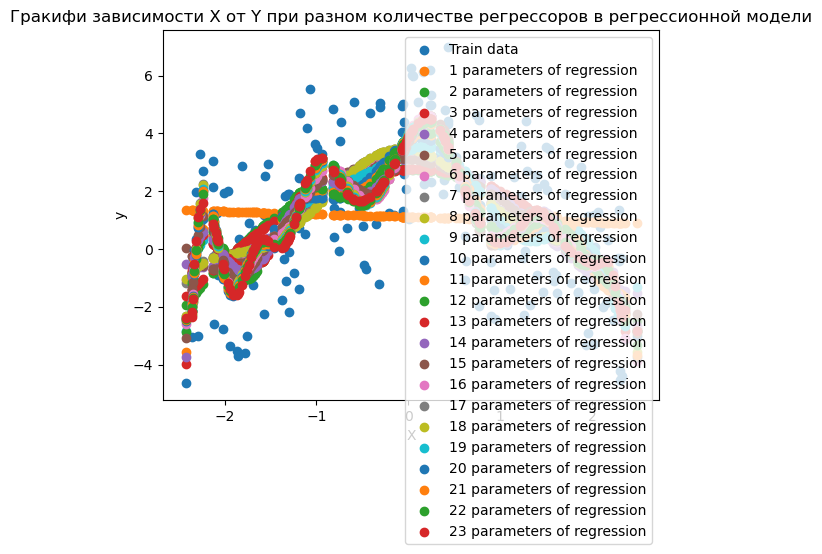

In [204]:
plt.scatter(X_train, y_train, label="Train data")
for param in params:
    f = param[0]
    for i, p in enumerate(param[1]):
        f += p * X_train ** (i + 1)
    plt.scatter(X_train, f, label=f"{i + 1} parameters of regression")

plt.title("Гракифи зависимости X от Y при разном количестве регрессоров в регрессионной модели")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

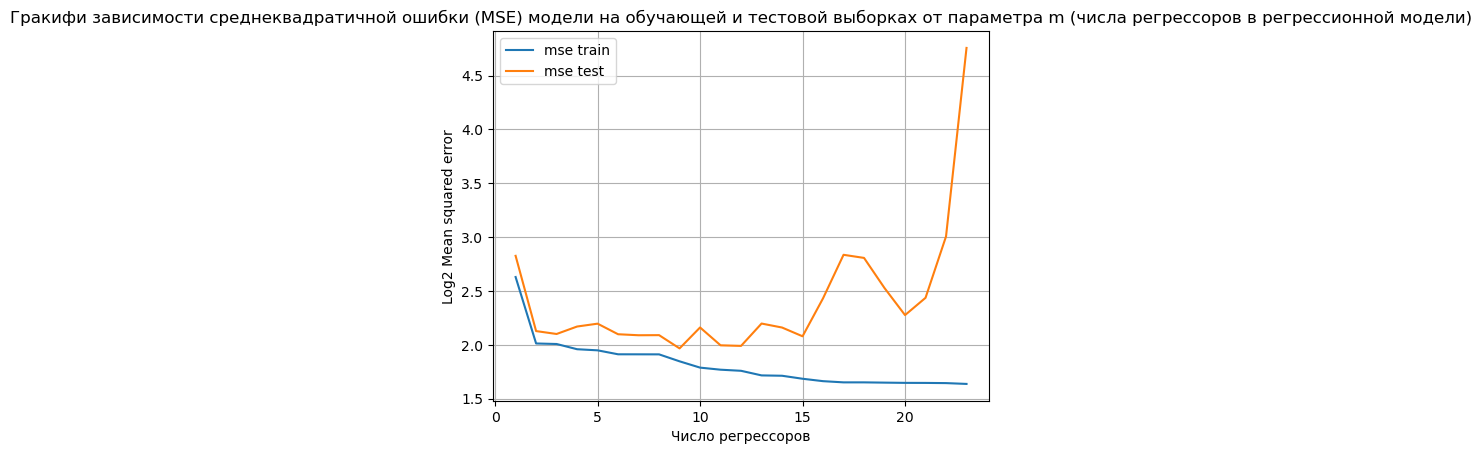

In [205]:
mse_train = []
mse_test = []
for param in params:
    f_train = param[0]
    f_test = param[0]
    for i, p in enumerate(param[1]):
        f_train += p * X_train ** (i + 1)
        f_test += p * X_test ** (i + 1)
    mse_train.append(np.mean((f_train - y_train) ** 2))
    mse_test.append(np.mean((f_test - y_test) ** 2))

plt.plot(range(1, m_max + 1), np.log2(mse_train), label="mse train")
plt.plot(range(1, m_max + 1), np.log2(mse_test), label="mse test")
plt.title("Гракифи зависимости среднеквадратичной ошибки (MSE) модели на обучающей и тестовой выборках от параметра m (числа регрессоров в регрессионной модели)")
plt.legend()
plt.xlabel("Число регрессоров")
plt.ylabel("Log2 Mean squared error")
plt.grid()
plt.show()

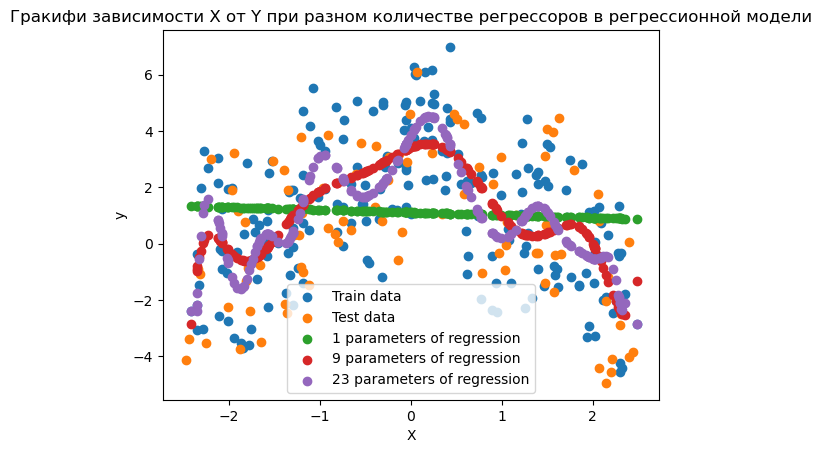

In [206]:
plt.scatter(X_train, y_train, label="Train data")
plt.scatter(X_test, y_test, label="Test data")
indexes = [0, 8, 22]
for idx in indexes:
    f = params[idx][0]
    for i, p in enumerate(params[idx][1]):
        f += p * X_train ** (i + 1)
    plt.scatter(X_train, f, label=f"{idx + 1} parameters of regression")

plt.title("Гракифи зависимости X от Y при разном количестве регрессоров в регрессионной модели")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

2. Построить графики зависимости выхода модели от x, наложенные на диаграмму рассеяния, для случаев: а) слишком простой модели; б) переобучения; в) хорошей обобщающей способности.

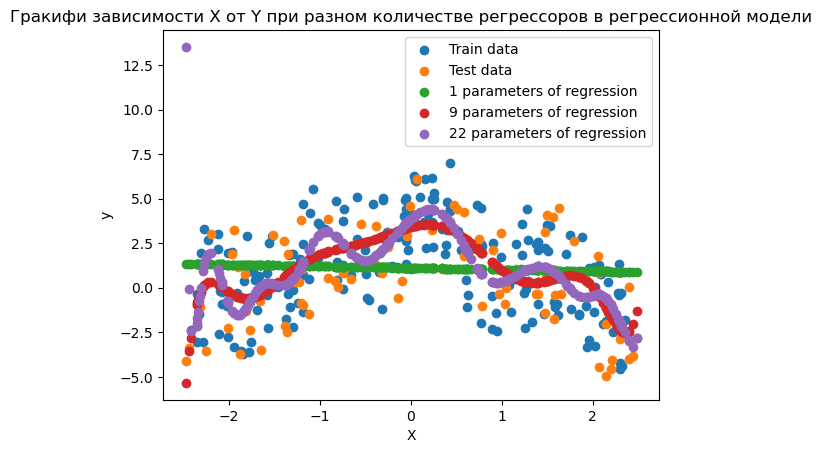

In [211]:
plt.scatter(X_train, y_train, label="Train data")
plt.scatter(X_test, y_test, label="Test data")
indexes = [0, 8, 21]
for idx in indexes:
    plt.scatter(X, predictions[idx], label=f"{idx + 1} parameters of regression")

plt.title("Гракифи зависимости X от Y при разном количестве регрессоров в регрессионной модели")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()